# statistical measurment uncertainty of the pendulum period

In [8]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from pathlib import PurePath, Path
from scipy.interpolate import approximate_taylor_polynomial
from scipy.optimize import curve_fit

In [9]:
from MathKit.statsengine import Statistics
from pendulum import Pendulum

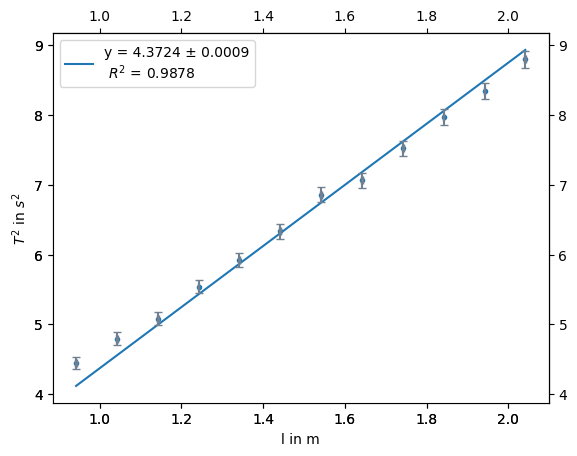

In [10]:
excel = PurePath(str(Path.cwd()) + "/" + ("F3_Fadenpendel_oscar.xlsx"))
excelanh = PurePath(str(Path.cwd()) + "/" + ("F3_Fadenpendel.xlsx"))
oma = Pendulum(excel)
mao = Pendulum(excelanh)

# oma.plot_slope(0.001, 0.0012, 0.01, 0.1)
# oma.combinedplot(0.001, 0.0012, 0.01, 0.1)

# mao.plot_slope(0.001, 0.0012, 0.01, 0.1)
mao.combinedplot(0.001, 0.0012, 0.01, 0.1)

In [11]:
# Daten, die gespeichert werden sollen
daten = ["Zeile 1", "Zeile 2", "Zeile 3"]

# Textdatei zum Schreiben öffnen (oder erstellen, wenn sie noch nicht existiert)
with open('F3_Results.txt', 'w') as datei:
    for zeile in daten:
        # Jede Zeile in die Datei schreiben
        datei.write(zeile + '\n')  # '\n' fügt einen Zeilenumbruch hinzu

# small angle approximation

how to set phi, so that the pendulum is in the small angle approximation? <br>

&ensp;&ensp;&ensp; sin(phi) ≈ phi -> max with an 1% error

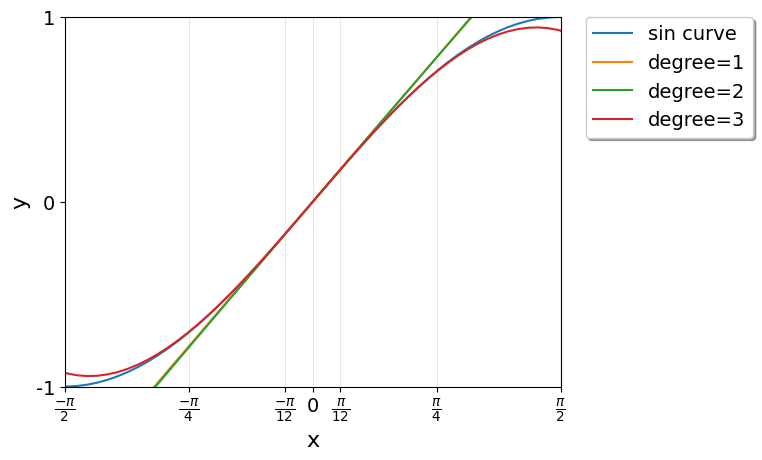

In [31]:
x = np.linspace(-np.pi, np.pi, 100) # generating 100 points between - π and π

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="sin curve")    # plot a sin(x) curve

for degree in np.arange(1, 4, step=1):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    
    ax.plot(x, sin_taylor(x), label=f"degree={degree}") # plotting the Taylorseries to the second degree


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True, fontsize=14)

ax.set_yticks([-1 , 0, 1])
ax.set_xticks([(- 0.5 * np.pi) , (- 0.25 * np.pi) ,(- (1/18) * np.pi) , 0, ((1/18) * np.pi), ( 0.25 * np.pi), ( 0.5 * np.pi)])
plt.axis([- 0.5 * np.pi, 0.5 * np.pi, -1, 1])
plt.grid(axis='x', color='0.90')
labels = [r'$\frac{-\pi}{2}$',r'$\frac{-\pi}{4}$',r'$\frac{-\pi}{12}$', r"0", r'$\frac{\pi}{12}$',r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$']

# labels = [r'$-\pi/2$',r'$-\pi/4$',r'$-\pi/18$', r"0", r'$\pi/18$',r'$\pi/4$', r'$\pi/2$']
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels([-1,0,1],fontsize=14)
# ax.set_title("Taylor Series at x = 0 of sin(x)")
plt.xlabel("x",fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()